In [85]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import re

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 3,307,660 Cases and 234,074 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link re
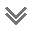

In [32]:
# Sending the request to the url
url='https://www.worldometers.info/coronavirus/'
r=requests.get(url)
r.text

In [34]:
# Using beautifulsoup parseing data
soup=BeautifulSoup(r.text,'html.parser')
#results=soup.find_all('table',attrs={'id':'main_table_countries_today'})
data=soup.findAll('tr')

In [35]:
data[9:]

[<tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">1,095,023</td>
 <td style="font-weight: bold; text-align:right;"></td>
 <td style="font-weight: bold; text-align:right;">63,856 </td>
 <td style="font-weight: bold; 
                                     text-align:right;"></td>
 <td style="font-weight: bold; text-align:right">152,324</td>
 <td style="text-align:right;font-weight:bold;">878,843</td>
 <td style="font-weight: bold; text-align:right">15,226</td>
 <td style="font-weight: bold; text-align:right">3,308</td>
 <td style="font-weight: bold; text-align:right">193</td>
 <td style="font-weight: bold; text-align:right">6,391,887</td>
 <td style="font-weight: bold; text-align:right">19,311</td>
 <td data-continent="North America" style="display:none">North America</td>
 </tr>, <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a cl

In [36]:
headers=data[0]
headers

<tr>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th style="display:none" width="30">Continent</th>
</tr>

In [37]:
data_without_header=data[9:222]
data_without_header

[<tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">1,095,023</td>
 <td style="font-weight: bold; text-align:right;"></td>
 <td style="font-weight: bold; text-align:right;">63,856 </td>
 <td style="font-weight: bold; 
                                     text-align:right;"></td>
 <td style="font-weight: bold; text-align:right">152,324</td>
 <td style="text-align:right;font-weight:bold;">878,843</td>
 <td style="font-weight: bold; text-align:right">15,226</td>
 <td style="font-weight: bold; text-align:right">3,308</td>
 <td style="font-weight: bold; text-align:right">193</td>
 <td style="font-weight: bold; text-align:right">6,391,887</td>
 <td style="font-weight: bold; text-align:right">19,311</td>
 <td data-continent="North America" style="display:none">North America</td>
 </tr>, <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a cl

In [40]:
col_headers=[th.getText() for th in headers.findAll('th')]
col_headers

['Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Continent']

In [41]:
df_data=[[td.getText() for td in tr.findAll('td')] for tr in data_without_header]
df_data

[['USA',
  '1,095,023',
  '',
  '63,856 ',
  '',
  '152,324',
  '878,843',
  '15,226',
  '3,308',
  '193',
  '6,391,887',
  '19,311',
  'North America'],
 ['Spain',
  '239,639',
  '',
  '24,543 ',
  '',
  '137,984',
  '77,112',
  '2,676',
  '5,125',
  '525',
  '1,455,306',
  '31,126',
  'Europe'],
 ['Italy',
  '205,463',
  '',
  '27,967 ',
  '',
  '75,945',
  '101,551',
  '1,694',
  '3,398',
  '463',
  '1,979,217',
  '32,735',
  'Europe'],
 ['UK',
  '171,253',
  '',
  '26,771 ',
  '',
  'N/A',
  '144,138',
  '1,559',
  '2,523',
  '394',
  '901,905',
  '13,286',
  'Europe'],
 ['France',
  '167,178',
  '',
  '24,376 ',
  '',
  '49,476',
  '93,326',
  '4,019',
  '2,561',
  '373',
  '724,574',
  '11,101',
  'Europe'],
 ['Germany',
  '163,009',
  '',
  '6,623 ',
  '',
  '123,500',
  '32,886',
  '2,415',
  '1,946',
  '79',
  '2,547,052',
  '30,400',
  'Europe'],
 ['Turkey',
  '120,204',
  '',
  '3,174 ',
  '',
  '48,886',
  '68,144',
  '1,514',
  '1,425',
  '38',
  '1,033,617',
  '12,255',
 

In [68]:
# changing into dataframes
df2=pd.DataFrame(df_data,columns=col_headers)
df2

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Continent
0,USA,"1,095,023",,"63,856",,"152,324","878,843","15,226","3,308",193,"6,391,887","19,311",North America
1,Spain,"239,639",,"24,543",,"137,984","77,112","2,676","5,125",525,"1,455,306","31,126",Europe
2,Italy,"205,463",,"27,967",,"75,945","101,551","1,694","3,398",463,"1,979,217","32,735",Europe
3,UK,"171,253",,"26,771",,N/A,"144,138","1,559","2,523",394,"901,905","13,286",Europe
4,France,"167,178",,"24,376",,"49,476","93,326","4,019","2,561",373,"724,574","11,101",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Western Sahara,6,,,,5,1,,10,,,,Africa
209,Caribbean Netherlands,5,,,,,5,,191,,110,"4,195",North America
210,Anguilla,3,,,,3,0,,200,,,,North America
211,Comoros,1,,,,,1,,1,,,,Africa


In [44]:
df2.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Continent'],
      dtype='object')

In [74]:
# Hence it has 13 columns and 213 rows but my other data have more rows.

In [75]:
# Replacing headers and formating to make more readable
df2.columns=['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousOrCritical',
       'TotalCasesIn1Mpop', 'DeathsIn1Mpop', 'TotalTests', 'TestsIn1Mpop',
       'Continent']

In [92]:
df2.tail(4)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousOrCritical,TotalCasesIn1Mpop,DeathsIn1Mpop,TotalTests,TestsIn1Mpop,Continent
209,Caribbean Netherlands,5,,,,,5,,191,,110,"4,195",North America
210,Anguilla,3,,,,3,0,,200,,,,North America
211,Comoros,1,,,,,1,,1,,,,Africa
212,Saint Pierre Miquelon,1,,,,,1,,173,,,,North America


In [162]:
# Performing the replacement on string using regular expression.
df3=df2.replace('[^\d.]','',regex=True)

In [163]:
# checking the string replacement
df3

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousOrCritical,TotalCasesIn1Mpop,DeathsIn1Mpop,TotalTests,TestsIn1Mpop,Continent
0,,1095023,,63856,,152324,878843,15226,3308,193,6391887,19311,
1,,239639,,24543,,137984,77112,2676,5125,525,1455306,31126,
2,,205463,,27967,,75945,101551,1694,3398,463,1979217,32735,
3,,171253,,26771,,,144138,1559,2523,394,901905,13286,
4,,167178,,24376,,49476,93326,4019,2561,373,724574,11101,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,,6,,,,5,1,,10,,,,
209,,5,,,,,5,,191,,110,4195,
210,,3,,,,3,0,,200,,,,
211,,1,,,,,1,,1,,,,


In [98]:
active_case=df3['ActiveCases'].astype(float)
active_case

0      878843.0
1       77112.0
2      101551.0
3      144138.0
4       93326.0
         ...   
208         1.0
209         5.0
210         0.0
211         1.0
212         1.0
Name: ActiveCases, Length: 213, dtype: float64

In [96]:
# Now it is in more readable format.

{'whiskers': [<matplotlib.lines.Line2D at 0xd509dac148>,
 'caps': [<matplotlib.lines.Line2D at 0xd509ff4308>,
 'boxes': [<matplotlib.lines.Line2D at 0xd509daa588>],
 'medians': [<matplotlib.lines.Line2D at 0xd509ff6d08>],
 'fliers': [<matplotlib.lines.Line2D at 0xd50a0a1c08>],
 'means': []}

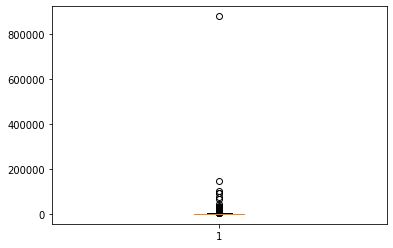

In [99]:
plt.boxplot(active_case)

In [100]:
# According to the boxplot we have seen some oulier on the data so we need 
# to remove the outlier to make our data more accurate.

In [107]:
# so lets calculate the Z-Score
from scipy import stats
z_score=stats.zscore(active_case)
z_score

array([ 1.39845110e+01,  1.08690883e+00,  1.48006377e+00,  2.16516910e+00,
        1.34774660e+00,  3.75436590e-01,  9.42638877e-01,  1.35546845e+00,
        6.37150313e-02,  5.74274308e-01,  3.06953405e-01,  3.18536185e-01,
        3.97717354e-01,  2.56938319e-01,  2.42797675e-01, -8.20349466e-02,
        2.08950219e-01,  2.07968900e-01,  1.58935133e-01,  1.27935110e-01,
       -5.71802318e-02, -5.80167659e-02,  3.95520659e-02,  8.62531901e-02,
       -3.75216807e-02, -3.83743020e-02, -1.22059885e-01,  2.65375259e-02,
        3.22323926e-02,  3.98738097e-02, -8.87038815e-03,  6.41244617e-03,
       -3.28563944e-02, -1.30135657e-01, -1.03182356e-02, -2.80624106e-02,
       -1.18858534e-01, -3.31620511e-02, -4.29752395e-02, -3.30172664e-02,
       -8.71345871e-02, -3.55429558e-02, -6.72186409e-02, -1.38581434e-01,
       -6.08159376e-02, -7.67905213e-02, -1.25792114e-01, -9.77682223e-02,
       -9.30546745e-02, -1.24907319e-01, -1.06085302e-01, -1.01017836e-01,
       -1.14048463e-01, -

In [105]:
# creating the dataframe using pandas
df_original=pd.DataFrame(active_case)
df_original

,ActiveCases
0,878843.0
1,77112.0
2,101551.0
3,144138.0
4,93326.0
...,...
208,1.0
209,5.0
210,0.0
211,1.0


In [109]:
# finding first and third quartiles
q1,q3=np.percentile(z_score,[25,75])
q1,q3

(-0.1531564313358034, -0.12392599979767031)

In [111]:
# finding IQR
iqr=q3-q1

In [112]:
# finding the range of data or lower bound or upper bound
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [113]:
lower_bound,upper_bound

(-0.197002078643003, -0.08008035249047069)

In [129]:
# finding outlier and assigning value after outlier
actual_data=df_original[(z_score<-0.08008035249047069)]
actual_data
# Hence this is the actual data after removing outlier.

,ActiveCases
15,4449.0
26,1961.0
33,1459.0
36,2160.0
40,4132.0
...,...
208,1.0
209,5.0
210,0.0
211,1.0


In [134]:
# checking the duplicates value
non_duplicated_value=actual_data.duplicated()
non_duplicated_value.sum()

48

In [140]:
# Now i have 48 duplicate values in the series.
# kepping first and dropping duplicates.
after_drop_duplicate=actual_data.drop_duplicates(keep='first')

In [139]:
after_drop_duplicate.shape

(125, 1)

In [143]:
# kepping last and dropping duplicate values
after_drop_duplicate1=actual_data.drop_duplicates(keep='last')
after_drop_duplicate1.shape

(125, 1)

In [147]:
# dropping duplicate using keep=False
after_drop_duplicate2=actual_data.drop_duplicates(keep=False)
after_drop_duplicate2.shape

(99, 1)

In [ ]:
# Now there is no duplicates. And there is no inconsistant values in the datasets.

In [ ]:
# Applying fuzzy string matching 

In [150]:
# Fuzzy matching of string using levenshtein distance method.
check_data=df2.Continent
print(check_data)

0      North America
1             Europe
2             Europe
3             Europe
4             Europe
           ...      
208           Africa
209    North America
210    North America
211           Africa
212    North America
Name: Continent, Length: 213, dtype: object


In [152]:
# importing required package for fuzzy string matching.
from fuzzywuzzy import process

In [155]:
def get_matches(query,choices,limit=6):
    results=process.extract(query,choices,limit=limit)
    return results

In [159]:
# applying the fuzzy string matching
get_matches('nor',check_data)

[('North America', 90, 0),
 ('North America', 90, 10),
 ('North America', 90, 21),
 ('North America', 90, 42),
 ('North America', 90, 44),
 ('North America', 90, 75)]

In [160]:
# applying the fuzzy string matching
get_matches('Asia',check_data)

[('Asia', 100, 6),
 ('Asia', 100, 8),
 ('Asia', 100, 14),
 ('Asia', 100, 18),
 ('Asia', 100, 22),
 ('Asia', 100, 23)]

In [161]:
# Hence, we can use this method based on the requirements.
# Note: This is the live data from worldometer and it is changing every hour.so data might be different while checking.
# Thanks!!!